In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
b_train = pd.read_csv('https://chananchida-srithongdee.github.io/data/B-train.csv')
b_test = pd.read_csv('https://chananchida-srithongdee.github.io/data/B-test.csv')


In [50]:
# b_train = b_train.fillna(b_train.mean())
b_train = b_train.dropna()
b_test = b_test.fillna(b_test.mean())
# b_test = b_test.dropna()

In [51]:
b_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 188
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      127 non-null    float64
 1   x2      127 non-null    float64
 2   x3      127 non-null    float64
 3   x4      127 non-null    float64
 4   x5      127 non-null    float64
 5   x6      127 non-null    float64
 6   x7      127 non-null    float64
 7   x8      127 non-null    float64
 8   y       127 non-null    float64
dtypes: float64(9)
memory usage: 9.9 KB


In [52]:
def drop_outlier(x):
    return x[(x < x.quantile(0.75) + 1.5*(x.quantile(0.75) - x.quantile(0.25))) & (x > x.quantile(0.25) - 1.5*(x.quantile(0.75) - x.quantile(0.25)))]
def cap_outlier(x):
    return x.clip(x.quantile(0.25) - 1.5*(x.quantile(0.75) - x.quantile(0.25)), x.quantile(0.75) + 1.5*(x.quantile(0.75) - x.quantile(0.25)))
# b_train = b_train.apply(drop_outlier)
# b_train.fillna(b_train.mean(), inplace=True)
b_train = b_train.apply(cap_outlier)

In [53]:
X_b = b_train[["x2","x1"]]
y_b = b_train["y"]
x_test_b = b_test.iloc[:,[1,0]]
# X_train_a, x_test_b, y_train_a, y_test_a = train_test_split(X_b, y_b, test_size=0.3, random_state=101)

In [54]:
model_b = LinearRegression()
model_b.fit(X_b,y_b)

LinearRegression()

In [55]:
y_pred_b = model_b.predict(x_test_b)
y_pred_b

array([-3.80564748,  2.66631205,  3.1778089 , -2.9265163 ,  0.3946328 ,
       -0.53849993, -3.06349484,  2.56404373, -2.13745284, -5.86594898])

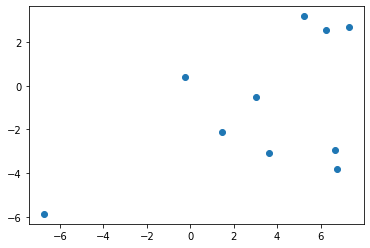

In [56]:
plt.scatter(y_b.iloc[0:10],y_pred_b)

In [57]:
model_b.score(X_b,y_b)

0.6701827320572583